The Goal of this analysis will be to see what predicts Total September Rainfall the best for the Gingin WA rainfall data (provided by BOM). 

We will treat each year as an IID, meaning that from 1989 to 2023 we have 35 rows in the dataset. 

### Load in the Relevant Libraries 

In [72]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import tree

### Load in the data

In [5]:
rainfall =  pd.read_csv("Gingin_Rainfall_data.csv")

Now that we have loaded the rainfall data, let's now explore the trends observed so far in 2023

In [11]:
rainfall_2023 = rainfall[rainfall["Year"] == 2023]

Plot the result using the package seaborn

In [ ]:
sns.barplot(rainfall_2023, x = "Month", y = "Monthly Precipitation Total (millimetres)")

Now try to creating linear model, predicting the september rainfall based on the preceding months. To begin with, the data will now need to be in wide format, where each Month is a a column (acting as a predictor). 

In [45]:
rainfall_wide = rainfall.pivot(values= "Monthly Precipitation Total (millimetres)", columns= "Month", index = "Year")

rainfall_wide = rainfall_wide.dropna()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1889,17.5,4.6,17.3,46.2,151.9,173.7,70.9,83.6,96.3,106.7,22.9,1.5
1890,14.0,33.3,0.5,12.4,88.4,146.8,90.7,146.3,60.7,101.6,1.0,11.7
1891,1.5,0.0,27.9,1.0,106.2,117.1,86.9,61.5,77.0,15.5,0.0,2.0
1892,0.0,1.5,34.5,34.3,85.3,76.5,97.0,169.9,56.4,16.5,11.4,0.0
1893,0.0,3.8,46.2,73.4,201.2,52.8,158.8,86.4,100.1,47.2,20.3,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1998,0.0,0.0,0.0,0.0,78.3,165.3,122.2,127.8,97.3,28.1,9.4,11.4
1999,102.2,0.0,54.6,2.1,145.8,123.0,136.5,122.9,124.2,86.0,0.0,6.1
2008,2.4,28.5,18.5,69.3,66.1,85.4,174.9,31.2,89.9,54.2,35.0,4.6


Now to run the linear model using sklearn

In [78]:
Y_train = rainfall_wide.iloc[1:80:,9].to_numpy()
X_train = rainfall_wide.iloc[1:80:,1:8].to_numpy()

Y_test = rainfall_wide.iloc[81:114:,9].to_numpy()
X_test = rainfall_wide.iloc[81:114:,1:8].to_numpy()

model = linear_model.LinearRegression()

<Axes: xlabel='test', ylabel='predict'>

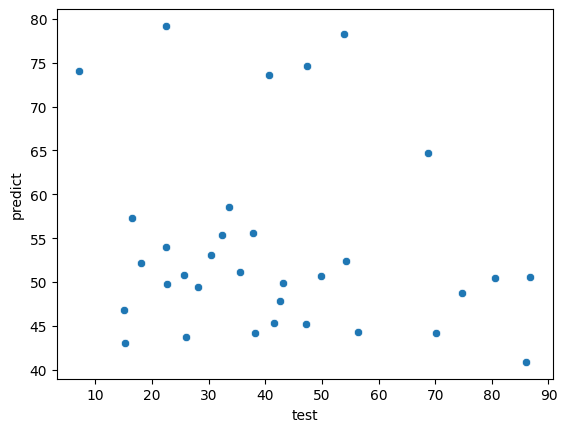

In [77]:
model.fit(X_train, Y_train)
september_y_pred = model.predict(X_test)

test_data = pd.DataFrame({'test': Y_test, 'predict': september_y_pred})

sns.scatterplot(data=test_data, x="test", y="predict")

This fit was very poor. Maybe some of the variables were unnecesary? Let's check the correlation matrix and only include important variables in the training data. 

<Axes: xlabel='Month', ylabel='Month'>

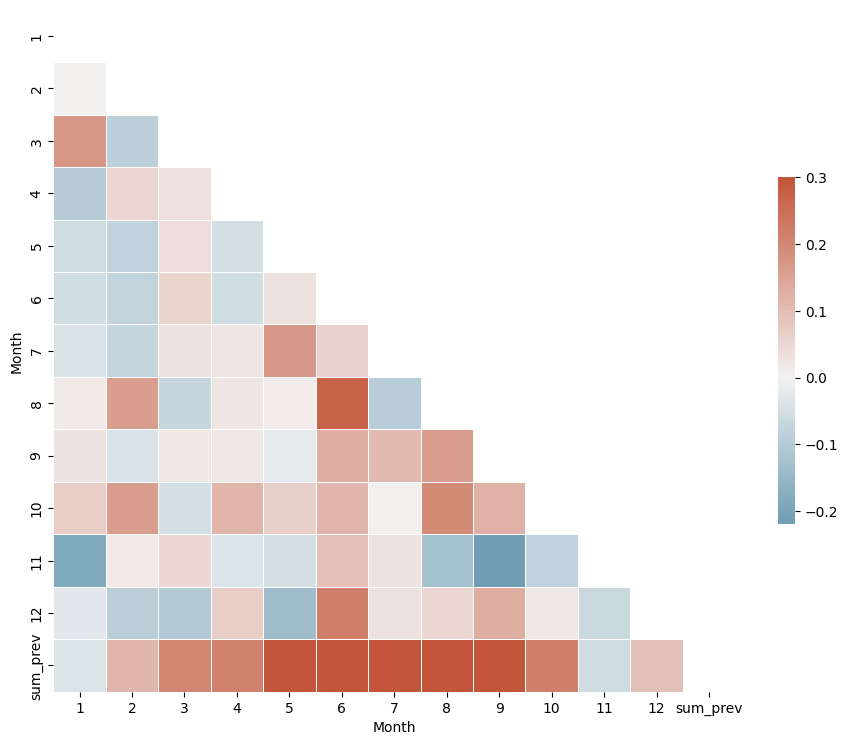

In [108]:
# Compute the correlation matrix
corr = rainfall_wide.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

As expected, only the previous two months are important for prediction. Let's now fit only according to these. 

In [87]:
Y_train = rainfall_wide.iloc[1:80:,9].to_numpy()
X_train = rainfall_wide.iloc[1:80:,7:8].to_numpy()

Y_test = rainfall_wide.iloc[81:114:,9].to_numpy()
X_test = rainfall_wide.iloc[81:114:,7:8].to_numpy()

model_2 = linear_model.LinearRegression()

<Axes: xlabel='test', ylabel='predict'>

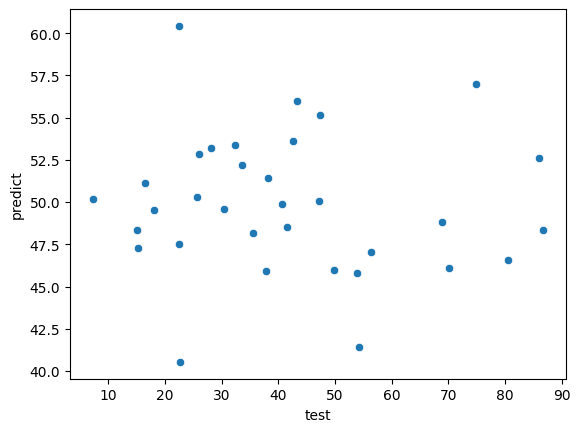

In [75]:
model_2 = model_2.fit(X_train, Y_train)
september_y_pred = model_2.predict(X_test)

test_data = pd.DataFrame({'test': Y_test, 'predict': september_y_pred})

sns.scatterplot(data=test_data, x="test", y="predict")

<Axes: xlabel='test', ylabel='predict'>

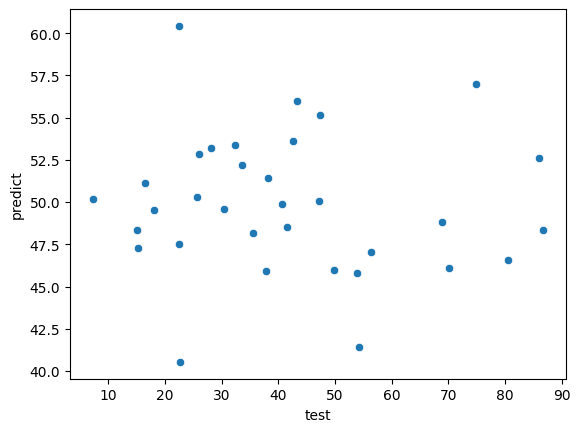

In [ ]:
model_2 = model_2.fit(X_train, Y_train)
september_y_pred = model_2.predict(X_test)

test_data = pd.DataFrame({'test': Y_test, 'predict': september_y_pred})

sns.scatterplot(data=test_data, x="test", y="predict")

A poor result again, let's now try a decision tree and see the result.

In [ ]:
clf = tree.DecisionTreeRegressor(max_depth=10)

clf = clf.fit(X_train, Y_train)

predict = clf.predict(X_test)

test_data = pd.DataFrame({'test': Y_test, 'predict': predict})

sns.scatterplot(data=test_data, x="test", y="predict")

Create a new variable named (Past year's rainfall)

In [99]:
rainfall_wide = rainfall_wide.assign(sum_prev =lambda x: x.iloc[:,1] + x.iloc[:,2] + x.iloc[:,3] + x.iloc[:,4] + x.iloc[:,5] + x.iloc[:,6] + x.iloc[:,7] + x.iloc[:,8])

In [ ]:
rainfall_wide

In [ ]:
rainfall_wide.iloc[:,[8,12]].corr()

In [113]:
Y_train = rainfall_wide.iloc[1:80:,8]
X_train = rainfall_wide.iloc[1:80:,11:12]

Y_test = rainfall_wide.iloc[81:114:,8]
X_test = rainfall_wide.iloc[81:114:,11:12]

model_2 = linear_model.LinearRegression()

<Axes: xlabel='test', ylabel='predict'>

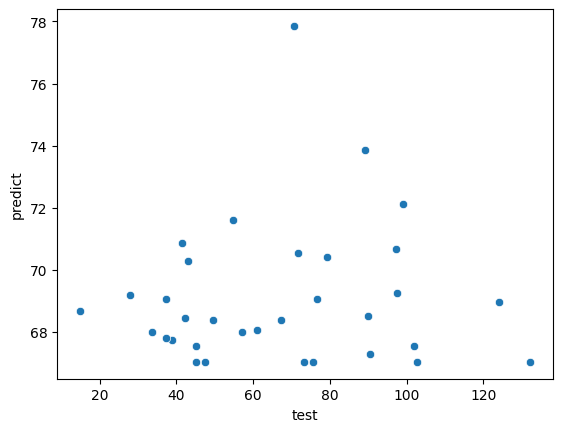

In [116]:
model_2.fit(X_train, Y_train)
september_y_pred = model_2.predict(X_test)

test_data = pd.DataFrame({'test': Y_test, 'predict': september_y_pred})

sns.scatterplot(data=test_data, x="test", y="predict")

In [ ]:

'
